## Logistic Regression

In [81]:
# Import all required libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean, std
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [82]:
# Import feature and target columns
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))

X_test = pickle.load(open("./common/metrics_test.p", "rb"))
X_train = pickle.load(open("./common/metrics_train.p", "rb"))
y_test = pickle.load(open("./common/status_test.p", "rb"))
y_train = pickle.load(open("./common/status_train.p", "rb"))

feature_cols = pickle.load(open("./common/feature_cols.p", "rb"))

### Find the best parameter in LR model

In [83]:
# Define the parameter grid
param_grid = [
    {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear']},
    {'penalty': ['elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['saga'], 'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
    {'penalty': ['l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['lbfgs']}
]

# Create a base model
logreg = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 105 candidates, totalling 525 fits


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


### Perform Cross Validation

In [84]:
# Define the model
clf_cv = LogisticRegression(penalty='l1', C=100, solver='liblinear', fit_intercept=False, max_iter=100, class_weight=None)

# Define metrics
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'precision_micro', 'recall_micro', 'f1_micro']

# Define the cross-validation procedure
cv = KFold(n_splits=10, shuffle=False)

# Evaluate the model using cross-validation
demo_cols = ["cpu_usage","memory_usage","bandwidth_inbound","bandwidth_outbound","response_time"]
scores = cross_validate(clf_cv, X, y, scoring=scoring, cv=cv, n_jobs=-1)

In [85]:
# Print scores
print('MACRO:')
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_macro']), std(scores['test_precision_macro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_macro']), std(scores['test_recall_macro'])))
print('F1 score: %.3f (%.3f)' % (mean(scores['test_f1_macro']), std(scores['test_f1_macro'])))
print()
print('MICRO:')
print('Precision: %.3f (%.3f)' % (mean(scores['test_precision_micro']), std(scores['test_precision_micro'])))
print('Recall: %.3f (%.3f)' % (mean(scores['test_recall_micro']), std(scores['test_recall_micro'])))
print('F1 score: %.3f (%.3f)' % (mean(scores['test_f1_micro']), std(scores['test_f1_micro'])))

MACRO:
Precision: 0.918 (0.076)
Recall: 0.898 (0.093)
F1 score: 0.906 (0.085)

MICRO:
Precision: 0.961 (0.041)
Recall: 0.961 (0.041)
F1 score: 0.961 (0.041)


### Feature Importance

In [86]:
# train a logistic regression model
clf_feature_imp = LogisticRegression(penalty='l1', C=100, solver='liblinear', fit_intercept=False, max_iter=100, class_weight=None)
# X = X[['cpu_usage', 'memory_usage']]
clf_feature_imp.fit(X, y)

# The coefficients (parameters of the logistic function) give us the feature importance
feature_importance = clf_feature_imp.coef_[0]

# normalize feature importance
feature_importance = 100.0 * (feature_importance / max(feature_importance))

# let's print the feature importance
for i in range(len(feature_importance)):
    print(f"Feature {i+1}: {feature_importance[i]}")

Feature 1: 100.0
Feature 2: -127.6362040759559
Feature 3: -0.010821045619928034
Feature 4: 0.010764119535538689
Feature 5: -1.4498351408223595
Feature 6: 0.011879225136778117


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train the model

In [87]:
# Create and train the model
clf = LogisticRegression(penalty='l1', C=100, solver='liblinear', fit_intercept=False, max_iter=100, class_weight=None)
clf.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, fit_intercept=False, penalty='l1', solver='liblinear')

In [88]:
# Use the model to make predictions on the test set
y_pred = clf.predict(X_test)

In [89]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9745958429561201
Precision: 0.8484848484848485
Recall: 0.8235294117647058
F1: 0.8358208955223881


### Visualize the model

In [90]:
clf_matrix = confusion_matrix(y_test, y_pred)
clf_matrix

array([[394,   5],
       [  6,  28]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

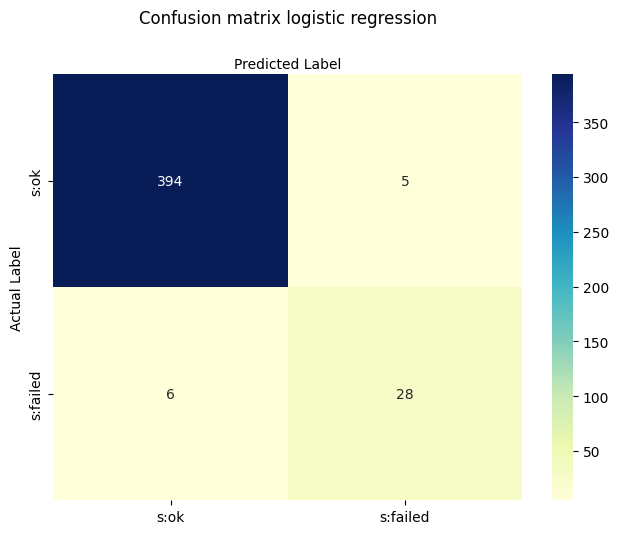

In [91]:
# Assuming clf_matrix is the confusion matrix you've computed
clf_matrix_df = pd.DataFrame(clf_matrix, index=["s:ok", "s:failed"], columns=["s:ok", "s:failed"])

# Create heatmap
class_names=["s:ok", "s:failed"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(clf_matrix_df, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix logistic regression', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Export the model

In [92]:
pickle.dump(clf, open("./models/logistic_regression.p", "wb"))